In [21]:
                        ###########################################################
                        ## Machine Predictive Maintenance Classification Dataset ##
                        ###########################################################
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# check version number
# import imblearn
datos_url= "C://Users/maxib/Source/repos/proyecto_final_coder/datos/Base_predictive_maintenance.csv"

In [22]:
# Leer .csv y creo un DF
df = pd.read_csv(datos_url, delimiter=",", index_col= ["UDI", "Product_ID"])
df.head()

,,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Target,Failure_Type
UDI,Product_ID,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


#  Analisis General

In [6]:
# Datos del Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (1, 'M14860') to (10000, 'M24859')
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air_temperature_[K]      10000 non-null  float64
 2   Process_temperature_[K]  10000 non-null  float64
 3   Rotational_speed_[rpm]   10000 non-null  int64  
 4   Torque_[Nm]              10000 non-null  float64
 5   Tool_wear_[min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure_Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 1.4+ MB


In [7]:
# Estadistica
df.describe()

,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [8]:
# Estadistica Transpuesta
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air_temperature_[K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process_temperature_[K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational_speed_[rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque_[Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool_wear_[min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Target,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


## Indicadores de desbalanceo

In [9]:
# Variable Target_1 desbalanceada
print(df["Target"].value_counts())

0    9661
1     339
Name: Target, dtype: int64


Insight: Se observa un gran desbalance en la variable Target

In [10]:
# Variable Target_2 desbalanceada
print(df["Failure_Type"].value_counts())

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure_Type, dtype: int64


## Clasificacion según feature type

In [11]:
# Clasificacion de variables por type data
    # Variable Failure Type es catergorica, pero TARGET SEGUN descripcion_Base1.txt .
categorical= []
int= []
float= []
for aux in df.columns:
  if df[aux].dtypes== 'object':
    categorical.append(aux)
  elif df[aux].dtypes== 'int64':
    int.append(aux)
  elif df[aux].dtypes== 'float64':
    float.append(aux)
print(categorical, int, float)


['Type', 'Failure_Type'] ['Rotational_speed_[rpm]', 'Tool_wear_[min]', 'Target'] ['Air_temperature_[K]', 'Process_temperature_[K]', 'Torque_[Nm]']


# Variables Categoricas

In [12]:
#####################################################################################################################

                                                #############################
                                                ## Analisis de Categoricas ##
                                                #############################

#####################################################################################################################
#Distr de los datos, V. categoricas
for cat in  categorical:
    print(cat)
    print(df[cat].describe())
    print()

    

Type
count     10000
unique        3
top           L
freq       6000
Name: Type, dtype: object

Failure_Type
count          10000
unique             6
top       No Failure
freq            9652
Name: Failure_Type, dtype: object



C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


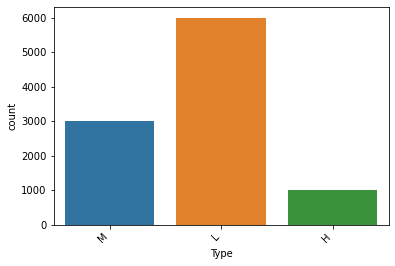

In [13]:
# Analisis Variable Type RECUENTO
draw = sns.countplot(df["Type"])
draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
plt.show()

## Analisis de frecuencia.

In [14]:
                                        ##################################################
                                        ## Analisis de frecuencias variable categoricas ##
                                        ##################################################
# Frecuencia Variable Type
frec_df= pd.DataFrame(df["Type"].value_counts())
# Renombramos el value_count como frecuencia absoluta
frec_df.rename(columns={"Type":"Frec_abs"},inplace=True)
# Calculamos la frecuencia absoluta acumulada
frec_acum= []
aux_acum= 0
for i in (frec_df["Frec_abs"].values):
    aux_acum= aux_acum + i
    frec_acum.append(aux_acum)
frec_df["Frec_abs_acum"]= frec_acum
# Frecuencia Relativa en % 
frec_df["Frec_rel_%"]= 100 * frec_df["Frec_abs"]/len(df.Type)
# Valores de las Frecuencias relativas
frec_rel_val= frec_df["Frec_rel_%"].values
frec_rel_acum= []
aux_acum= 0
for i in frec_rel_val:
    aux_acum= aux_acum + i
    frec_rel_acum.append(aux_acum)
frec_df["Frec_rel_%_acum"]= frec_rel_acum
frec_df

,Frec_abs,Frec_abs_acum,Frec_rel_%,Frec_rel_%_acum
L,6000,6000,60.00,60.00
M,2997,8997,29.97,89.97
H,1003,10000,10.03,100.00


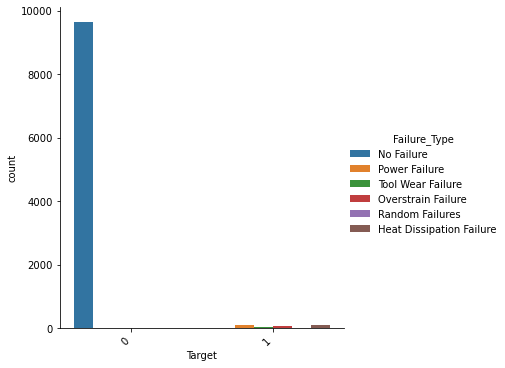

In [33]:
# Recuento de la variable Target_2
draw = sns.catplot(x="Target", hue="Failure_Type", data=df, kind="count")
draw.set_xticklabels(rotation=45, ha="right")
plt.show()

En el grafico se puede ver un gran desbalance entre los registros sin fallas y los que representan fallas. 
se procedera a ignorar los registros de No Failure(Outlier).

# Creación de DFs segmentando por Falla y No Falla

In [16]:
# Filtramos variables para centrarnos en los momentos de falla 
fallas= df[df['Failure_Type']!="No Failure"]
# Filtramos momentos sin fallas
sin_fallas= df[df['Failure_Type']=="No Failure"]

C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


'Este grafico muestra como se distribuyen los puntos de rotura, sin embargo son pocos los registros que se ven representados en este grafico'

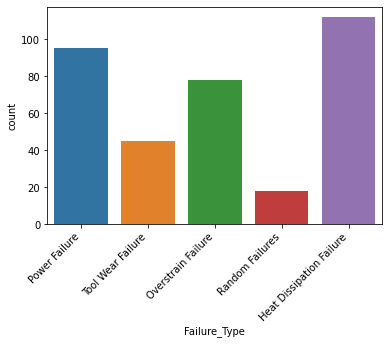

In [17]:
# Graficamos un conteo de roturas 
grafico= sns.countplot(fallas["Failure_Type"])
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha="right")

Este grafico muestra como se distribuyen los puntos de rotura, sin embargo son pocos los registros que se ven representados en este grafico

C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


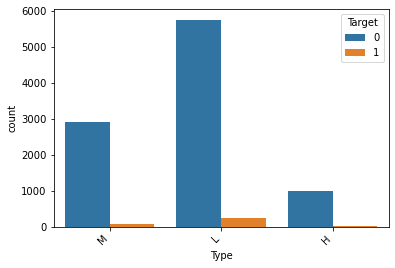

In [18]:
# Conteo de type segmentado según Type
draw = sns.countplot(df["Type"], hue= df['Target'])
draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
plt.show()

C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


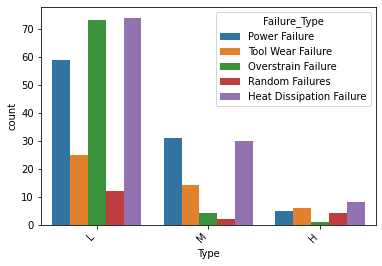

In [19]:
# Conteo segmentacion 
draw = sns.countplot(fallas["Type"], hue= fallas['Failure_Type'])
draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
plt.show()

# Variables Numericas

## Variables INT

Rotational_speed_[rpm]


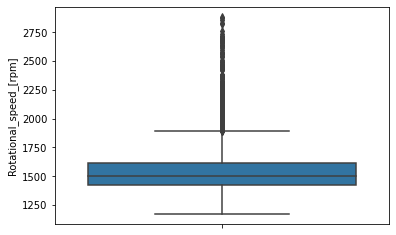

Tool_wear_[min]


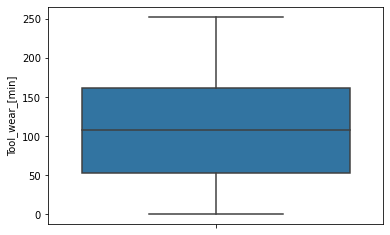

Target
Target es un outlier debido a que su valor es 0 o 1


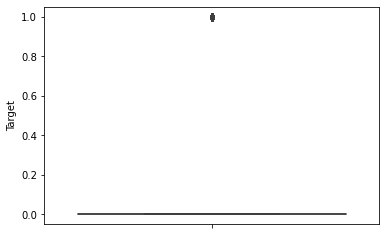

In [20]:
                          #####################################
                          ## Analisis de variables Numericas ##
                          #####################################
# Analisis de int
for aux in int:
  print(aux)
  if aux== "Target":
    print("Target es un outlier debido a que su valor es 0 o 1")
  draw = sns.boxplot(y=df[aux], data=df, hue=df['Target'])
  draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
  plt.show()
  

'La produccion de el elemento L es el mas producido y el que mas desgaste de la herramienta produce'

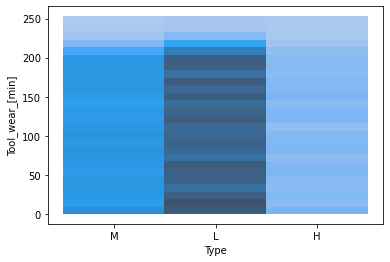

In [21]:
# Histogramas de desgaste.
hist= sns.histplot(y=df["Tool_wear_[min]"], x=df["Type"])

La produccion de el elemento L es el mas producido y el que mas desgaste de la herramienta produce.

## Variables FLOAT

Air_temperature_[K]


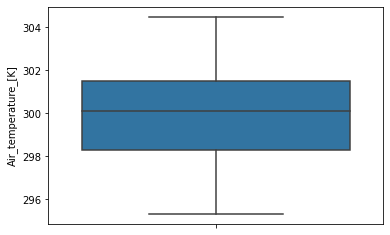

Process_temperature_[K]


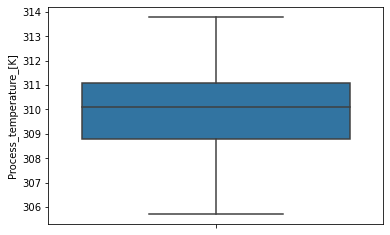

Torque_[Nm]


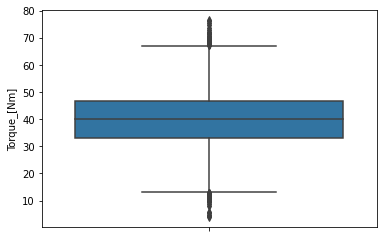

In [22]:
# Analisis de float
for aux in float:
  print(aux)
  draw = sns.boxplot(y=df[aux], data=df, hue=df['Target'])
  draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
  plt.show()

# Analisis Bivariado

## Correlación

Text(0.5, 1.05, 'Correlacion de Pearson variables numéricas')

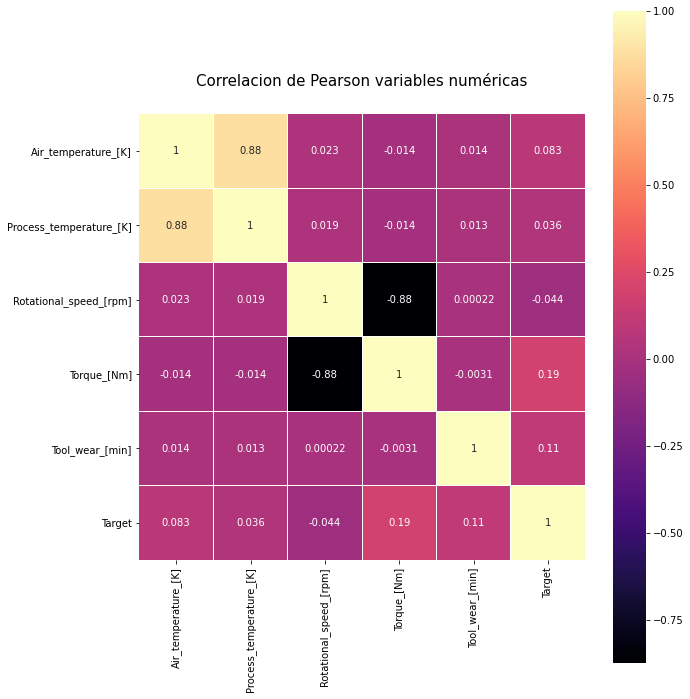

In [23]:
                                ########################
                                ## Analisis Bivariado ##
                                ########################
# Ploteamos un grafico de correlación de Pearson
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="magma", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Correlacion de Pearson variables numéricas", y=1.05, size=15)

## Analisis mixto

''

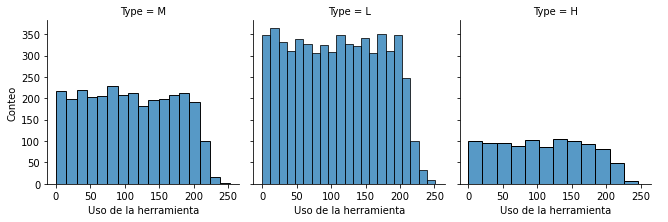

In [24]:
# Analisis bivariado entre variable numerica y categorica.
# Tool wear segun type
g= sns.FacetGrid(df, col="Type")
g.map_dataframe(sns.histplot, x="Tool_wear_[min]")
g.set_axis_labels(x_var="Uso de la herramienta", y_var= "Conteo")
g.add_legend()
""

'Este grafico muestra que la velocidad de la heramienta para la produccion de los diferentes productos se encuentra en valores similares '

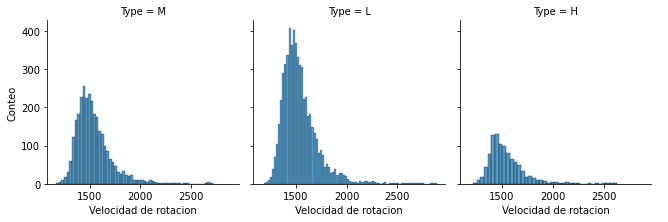

In [25]:
# Rotational speed segun type
g= sns.FacetGrid(df, col="Type")
g.map_dataframe(sns.histplot, x="Rotational_speed_[rpm]")
g.set_axis_labels(x_var="Velocidad de rotacion", y_var= "Conteo")
g.add_legend()

Este grafico muestra que la velocidad de la heramienta para la produccion de los diferentes productos se encuentra en valores similares.

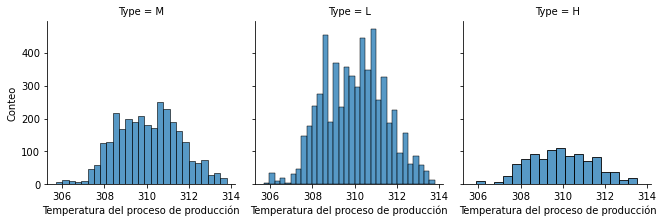

In [34]:
# Rotational speed segun type
g= sns.FacetGrid(df, col="Type")
g.map_dataframe(sns.histplot, x="Process_temperature_[K]")
g.set_axis_labels(x_var="Temperatura del proceso de producción", y_var= "Conteo")
g.add_legend()


## Analisis de features numericos sin fallas

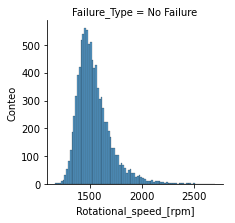

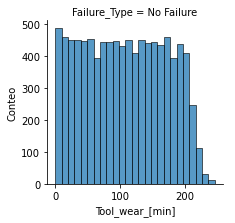

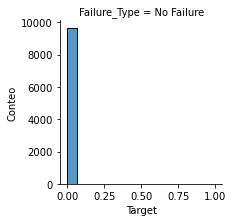

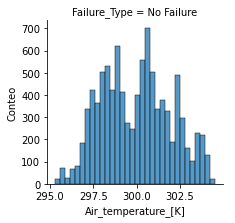

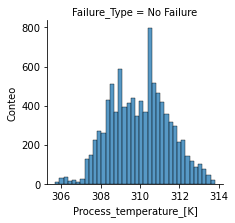

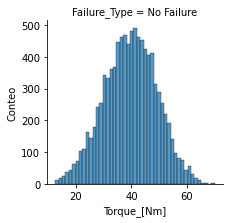

In [27]:
# Analisis de variables numericas en situacion de no falla
variables_numericas= int+float
for var_name in variables_numericas:
    g= sns.FacetGrid(sin_fallas, col="Failure_Type")
    g.map_dataframe(sns.histplot, x=var_name)
    g.set_axis_labels(x_var=var_name, y_var= "Conteo")
    g.add_legend()

## Analisis de features en puntos de falla

- Antes de analizar los graficos es importante tener en cuenta algunos puntos:
    - Ver los boxplots para ver las medianas de cada variable.
    - Ver los comportamientos de las variables en los momentos de No Failure.
    - Los problemas de Falla de Energia, impacta sobre la velocidad de rotación y el torque alejandose de la mediana.
    - Las Fallas de sobre-esfuerzo se producen con valores de torque altos y gran cantidad de minutos de uso de la herramienta.
    - La falta de disipacion de temperatura se presenta a bajas velocidades de rotación y altas temperaturas, mostrando el la problematica.

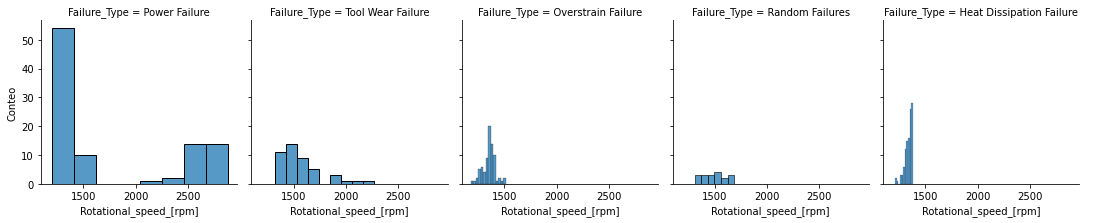

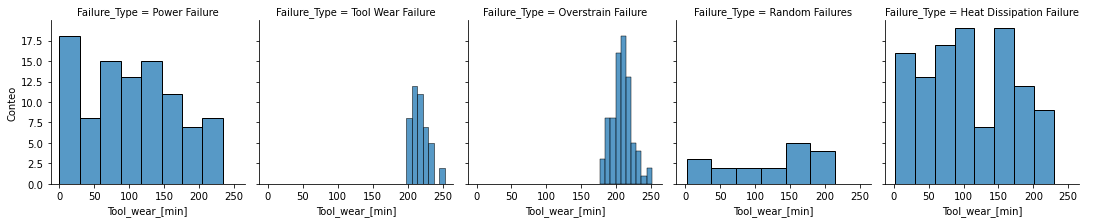

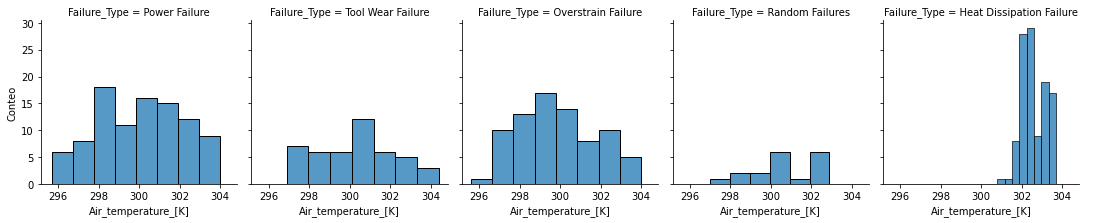

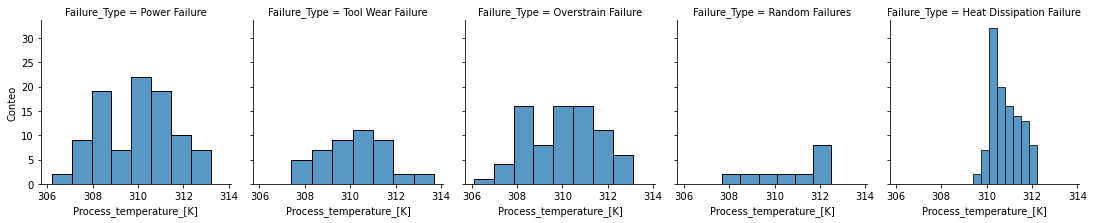

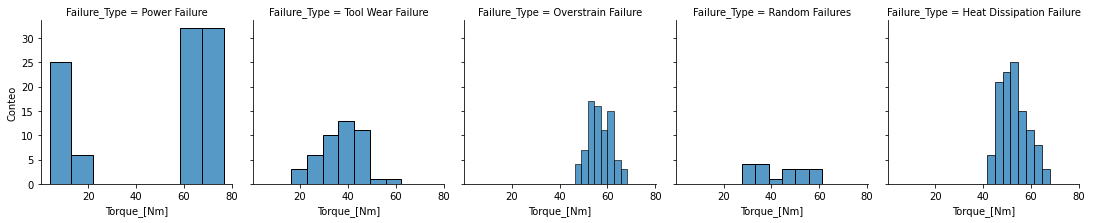

In [28]:
# Analisis de variables numericas segmentadas segun tipo de falla 
for var_name in variables_numericas:
    if var_name == "Target":
        continue
    g= sns.FacetGrid(fallas, col="Failure_Type")
    g.map_dataframe(sns.histplot, x=var_name)
    g.set_axis_labels(x_var=var_name, y_var= "Conteo")
    g.add_legend()

# Insight: Estos graficos describen el comportamiento de las variables durante los momentos de falla:
- La primera columna de graficos muestra los puntos de Power Failure y como se comportan las diferentes variables, es importante notar como las variables Rotational_speed y Torque varian en comparación de los graficos de los momentos sin fallas, estos se distribuyen lejos de la media correspondiente (Torque = 40Nm, Rotational_speed = 1500 rpm), lo cual es esperable teniendo problemas de potencia. Es importante notar que esta falla se presenta una mayor cantidad de veces en los primeros minutos de uso, siendo esta una razon para creer que puede ser un problema de calibración de la herramienta.

- La segunda columna representa la fallas por desgaste, por uso de la misma, esta falla es particular ya que solo se puede concluir que esta falla se presenta en momentos donde los valores de Tool_wear(min) son altos, es por eso que esta variable debe ser analizada pensando en cuales son los valores de Tool_wear maximos que se deben llegar antes de realizar el remplazo de piezas para evitar fallas.

- La columna del medio refiera a los problemas por sobreesfuerzo, esta falla presenta tres caracteristicas marcadas en los datos que explican la falla, lo primero que se observa es bajos valores de rpm que se explica por valores altos de Torque, a esto se le suma la tercer caracteristica, determinante para esta tipo de rotura, altos valores de Tool_wear, la combinacion entre alto Torque y gran cantidad de desgaste resulta en una falla por Overstrain.

- Las datos de Random failure no muestran ningun comportamiento marcados.

- Heat Dissipattion failure, esta falla presenta bajas rpm, altos niveles torque y altos niveles de temperatura. Esta falla a diferencia de las anteriores, es independiente de la variable Tool_wear, ya que se produce en cualquier momente según los graficos.